# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
state_edu = pd.read_csv('../data/states_edu.csv')
state_edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
state_edu.rename({
    'PRIMARY_KEY':'Year_and_Sschool'
},axis=1, inplace= True)
state_edu.dropna()
print(state_edu.head())
# type(state_edu["YEAR"])

  Year_and_Sschool       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 reading*

How many years of data are logged in our dataset? 

In [5]:
num_years = state_edu["YEAR"].nunique()
num_years

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [6]:
def tes_read_score():
    if state_edu[state_edu["STATE"] == "Michigan"]["AVG_READING_4_SCORE"].mean() > state_edu[state_edu["STATE"] == "Ohio"]["AVG_READING_4_SCORE"].mean():
        print("UMICH > OHIO")
    else :
        print("UMICH < OHIO")

tes_read_score()

UMICH < OHIO


Find the average for your chosen test across all states in 2019

In [7]:
state_edu[state_edu["YEAR"] == 2019]["AVG_READING_4_SCORE"].mean()

219.79245283018867

For each state, find a maximum value for your chosen test score

In [8]:
state_max = state_edu.groupby("STATE")["AVG_READING_4_SCORE"].max()
print(state_max)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
state_edu.head()

,Year_and_Sschool,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [13]:
# Create a new feature for expenditure per student
state_edu['expenditure_per_student'] = state_edu['TOTAL_EXPENDITURE'] / state_edu['GRADES_ALL_G']

# Handle any division by zero or missing values by replacing with NaN
state_edu['expenditure_per_student'].replace([np.inf, -np.inf], np.nan, inplace=True)

print(state_edu['expenditure_per_student'])

# Create a feature for the proportion of federal revenue to total revenue
state_edu['federal_revenue_share'] = state_edu['FEDERAL_REVENUE'] / state_edu['TOTAL_REVENUE']

# Handle any division by zero or missing values
state_edu['federal_revenue_share'].replace([np.inf, -np.inf], np.nan, inplace=True)


0       3.627221
1       7.939520
2       5.050774
3       3.948044
4       5.164536
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: expenditure_per_student, Length: 1715, dtype: float64


C:\Users\super\AppData\Local\Temp\ipykernel_26804\1723829394.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  state_edu['expenditure_per_student'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\super\AppData\Local\Temp\ipykernel_26804\1723829394.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

Feature engineering justification: **<expenditure per student, calculated as the ratio of total expenditure to the total number of students. 
>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

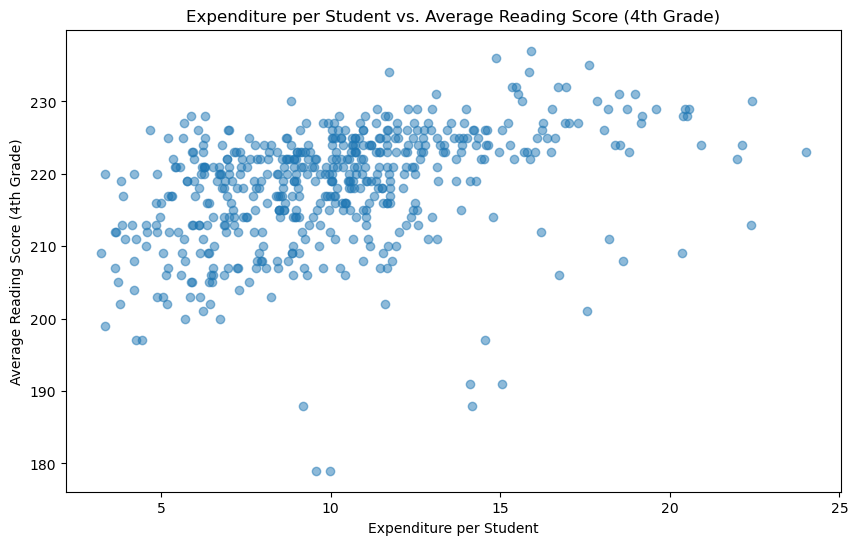

In [11]:
import matplotlib.pyplot as plt

# Scatter plot of expenditure per student vs. average reading score
plt.figure(figsize=(10, 6))
plt.scatter(state_edu['expenditure_per_student'], state_edu['AVG_READING_4_SCORE'], alpha=0.5)

# Adding title and labels
plt.title('Expenditure per Student vs. Average Reading Score (4th Grade)')
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Reading Score (4th Grade)')

# Show plot
plt.show()


**Below is an example code to create a scatter plot to visualize the relationship between expenditure_per_student and AVG_READING_4_SCORE.
**

**Visualization 2**

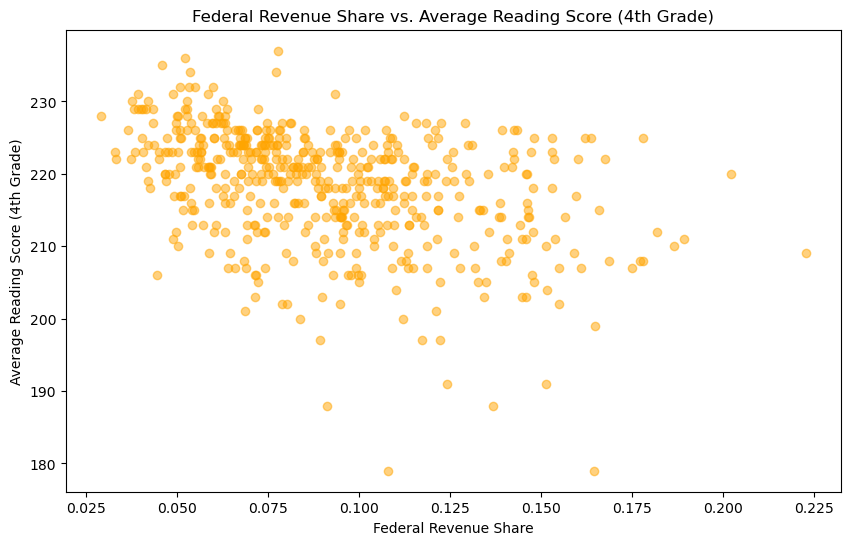

In [14]:
# Scatter plot of federal revenue share vs. average reading score
plt.figure(figsize=(10, 6))
plt.scatter(state_edu['federal_revenue_share'], state_edu['AVG_READING_4_SCORE'], alpha=0.5, color='orange')

# Adding title and labels
plt.title('Federal Revenue Share vs. Average Reading Score (4th Grade)')
plt.xlabel('Federal Revenue Share')
plt.ylabel('Average Reading Score (4th Grade)')

# Show plot
plt.show()


**how the federal revenue share (federal_revenue_share) correlates with the average reading score.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [15]:
from sklearn.model_selection import train_test_split

In [33]:
X = state_edu[['expenditure_per_student', 'federal_revenue_share']]
y = state_edu['AVG_READING_4_SCORE']

In [34]:
data = pd.concat([X, y], axis=1).dropna()

# Step 3: Split the clean data into features (X) and target (y)
X = data[['expenditure_per_student', 'federal_revenue_share']]
y = data['AVG_READING_4_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (366, 2)
X_test shape: (157, 2)
y_train shape: (366,)
y_test shape: (157,)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [22]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [36]:
# create your model here
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 42.21205902100926
R-squared (R²): 0.34506399467680926


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

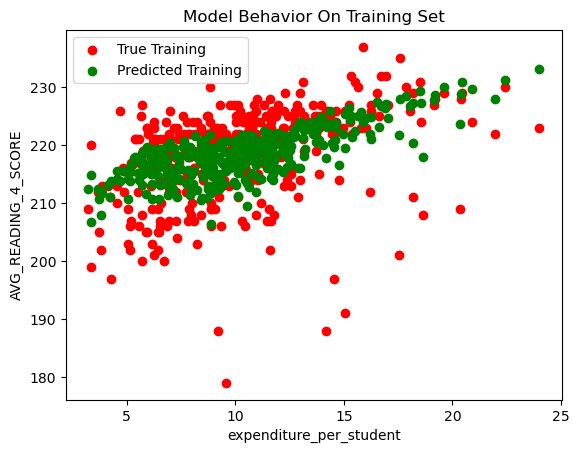

In [43]:

col_name = 'expenditure_per_student'  


plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")


plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')  
plt.title("Model Behavior On Training Set")

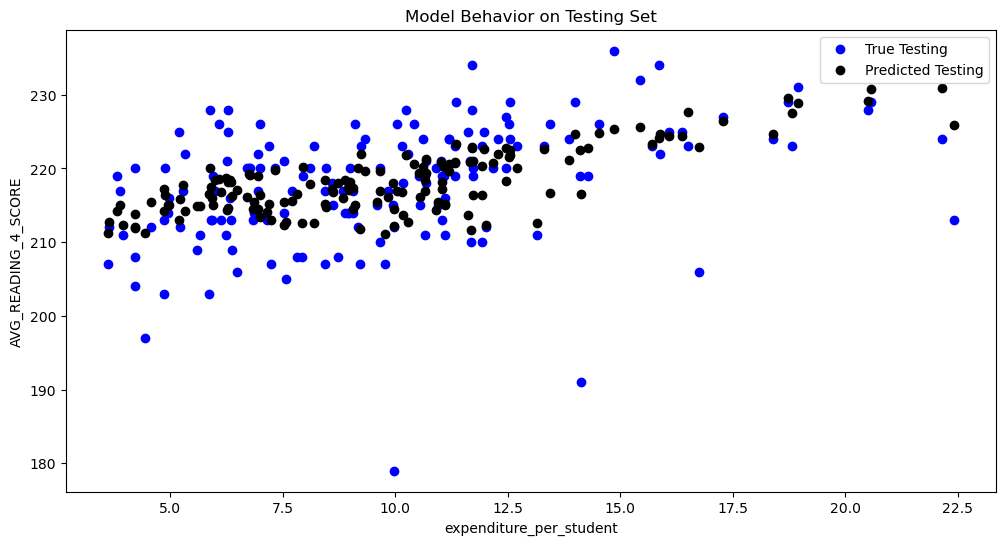

In [42]:
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color="blue")
plt.scatter(X_test[col_name], model.predict(X_test), color="black")

plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')  # Modify to reflect the target variable
plt.title("Model Behavior on Testing Set")

plt.show()